In [1]:
import pandas as pd
import wbgapi as wb
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Linear Regression

For today's lecture, I am using the 3rd Chapter of [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/) by Gareth et.al., 3rd Chapter of [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) by Hastie et.al. and the 3rd Chapter of [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) by Bishop.

## Ordinary Least Squares Regression

Assume we have a data set consisting of numerical pairs $(x_i,y_i)$, and assume also that upon some inspection, we guess that there is a linear dependence between $x_i$'s and $y_i$'s of the form

$$  y_i \approx \alpha x_i + \beta + \epsilon $$

In this scenario, we assume the $y_i$ values depend on $x_i$ values functionally, moreover, we also assume that the functional relationship is linear. In such cases, $y_i$'s are called *dependent variable* and $x_i$'s are called *independent variables*. Our task is then to calculate the best fitting $\alpha$ and $\beta$ for this set.

## How and why does linear regression work?
   
The question we need to ask is, in linear regression what is our **fit criteria** or what is our **error function**?

$$ RSS(\alpha,\beta) = \sum_{i=1}^N (\alpha x_i + \beta - y_i)^2 $$

The (ordinary least square) regression finds $\alpha$ and $\beta$ that minimizes this function $RSS(\alpha,\beta)$:
$$ \alpha = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y})}{\sum_i (x_i - \overline{x})^2}, \qquad \beta = \overline{y} - \alpha \overline{x} $$
    
## How do we judge if the model fit?

The $R^2$-statistic tells us how much of the error is explained by the independent variable:
$$ RSE(\alpha,\beta) = \sqrt{\frac{RSS(\alpha,\beta)}{n-2}}, \qquad R^2 = 1 - \frac{RSE}{RSS} $$


## Examples


In [2]:
litrate = pd.DataFrame(list(wb.data.fetch('SE.ADT.LITR.FE.ZS')))
litrate

,value,series,economy,aggregate,time
0,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2021
1,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2020
2,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2019
3,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2018
4,NaN,SE.ADT.LITR.FE.ZS,ZWE,False,YR2017
...,...,...,...,...,...
16487,NaN,SE.ADT.LITR.FE.ZS,AFE,True,YR1964
16488,NaN,SE.ADT.LITR.FE.ZS,AFE,True,YR1963
16489,NaN,SE.ADT.LITR.FE.ZS,AFE,True,YR1962
16490,NaN,SE.ADT.LITR.FE.ZS,AFE,True,YR1961


In [3]:
mortality = pd.DataFrame(list(wb.data.fetch('SH.DYN.MORT')))
mortality

,value,series,economy,aggregate,time
0,NaN,SH.DYN.MORT,ZWE,False,YR2021
1,53.9,SH.DYN.MORT,ZWE,False,YR2020
2,54.2,SH.DYN.MORT,ZWE,False,YR2019
3,54.8,SH.DYN.MORT,ZWE,False,YR2018
4,57.0,SH.DYN.MORT,ZWE,False,YR2017
...,...,...,...,...,...
16487,NaN,SH.DYN.MORT,AFE,True,YR1964
16488,NaN,SH.DYN.MORT,AFE,True,YR1963
16489,NaN,SH.DYN.MORT,AFE,True,YR1962
16490,NaN,SH.DYN.MORT,AFE,True,YR1961


In [4]:
ltr = litrate[['time','value']][litrate['economy']=='TUR']
ltr.index = ltr.time
del ltr['time']
ltr.columns = [['literacy']]
ltr

,literacy
time,
YR2021,NaN
YR2020,NaN
YR2019,94.424042
YR2018,NaN
YR2017,93.498268
...,...
YR1964,NaN
YR1963,NaN
YR1962,NaN


In [5]:
mtr = mortality[['time','value']][mortality['economy']=='TUR']
mtr.index = mtr.time
del mtr['time']
mtr.columns = [['mortality']]
mtr

,mortality
time,
YR2021,NaN
YR2020,9.5
YR2019,10.1
YR2018,10.7
YR2017,11.4
...,...
YR1964,225.7
YR1963,233.5
YR1962,241.4


In [6]:
def extract(df,cntry,name):
    tmp = df[['time','value']][df['economy']==cntry]
    tmp.index = tmp.time
    del tmp['time']
    tmp.columns = [[name]]
    return tmp

def litvsmor(cntry):
    lit = extract(litrate,cntry,'literacy')
    mor = extract(mortality,cntry,'mortality')
    res = mor.join(lit)
    res.dropna(inplace=True)
    return res

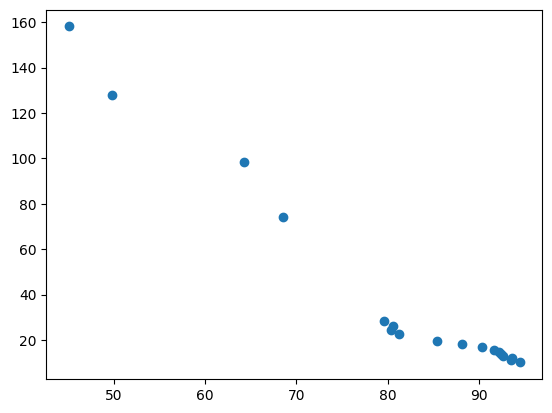

In [7]:
tr = litvsmor('TUR')
plt.scatter(tr['literacy'],tr['mortality'])

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     275.9
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           1.64e-11
Time:                        19:52:12   Log-Likelihood:                -67.223
No. Observations:                  18   AIC:                             138.4
Df Residuals:                      16   BIC:                             140.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           273.0338     14.304     19.089

/home/kaygun/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


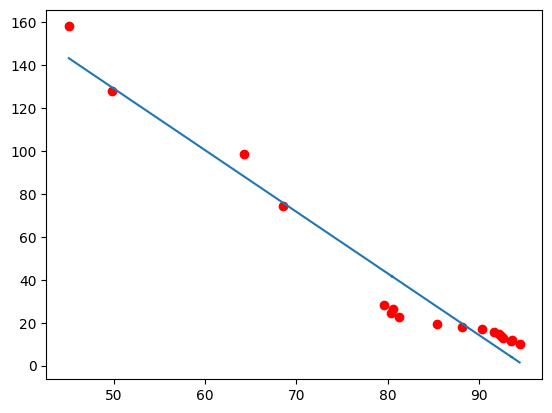

In [8]:
res = litvsmor('TUR')
X = res['literacy']
Y = res['mortality']
XX = sm.add_constant(X)
model = sm.OLS(Y,XX)
results = model.fit()
alpha,beta = results.params
print(results.summary())
plt.scatter(X,Y,c='red')
plt.plot(X,alpha + beta*X)

In [9]:
gini = pd.DataFrame(list(wb.data.fetch('SI.POV.GINI')))
gini

,value,series,economy,aggregate,time
0,NaN,SI.POV.GINI,ZWE,False,YR2021
1,NaN,SI.POV.GINI,ZWE,False,YR2020
2,50.3,SI.POV.GINI,ZWE,False,YR2019
3,NaN,SI.POV.GINI,ZWE,False,YR2018
4,44.3,SI.POV.GINI,ZWE,False,YR2017
...,...,...,...,...,...
16487,NaN,SI.POV.GINI,AFE,True,YR1964
16488,NaN,SI.POV.GINI,AFE,True,YR1963
16489,NaN,SI.POV.GINI,AFE,True,YR1962
16490,NaN,SI.POV.GINI,AFE,True,YR1961


In [10]:
def morvsgini(cntry):
    gin = extract(gini,cntry,'gini')
    mor = extract(mortality,cntry,'mortality')
    res = gin.join(mor)
    res.dropna(inplace=True)
    return res

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.390
Date:                Sun, 16 Oct 2022   Prob (F-statistic):              0.140
Time:                        19:52:40   Log-Likelihood:                -85.053
No. Observations:                  20   AIC:                             174.1
Df Residuals:                      18   BIC:                             176.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -153.7370    115.269     -1.334      0.1

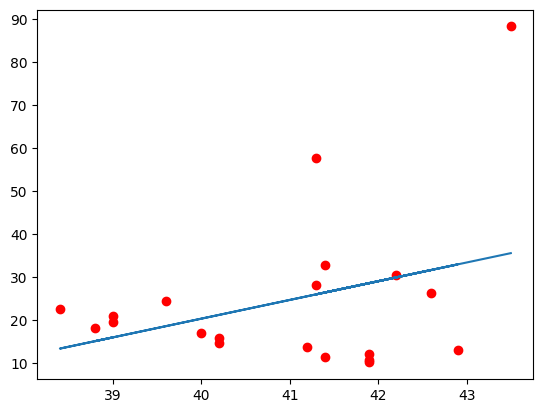

In [11]:
res = morvsgini('TUR')
X = res['gini']
Y = res['mortality']
XX = sm.add_constant(X)
model = sm.OLS(Y,XX)
results = model.fit()
alpha,beta = results.params
print(results.summary())
plt.scatter(X,Y,c='red')
plt.plot(X,alpha + beta*X)

In [12]:
def litvsgini(cntry):
    lit = extract(litrate,cntry,'literacy')
    gin = extract(gini,cntry,'gini')
    res = gin.join(lit)
    res.dropna(inplace=True)
    return res

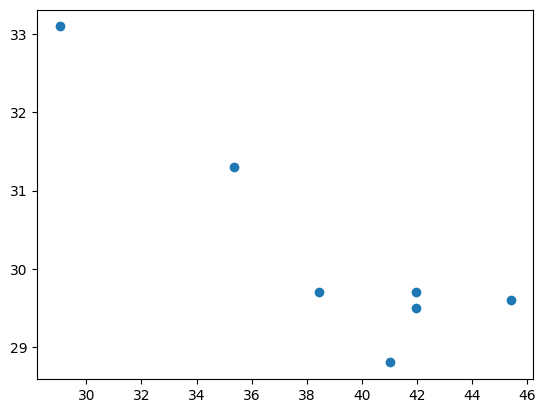

In [13]:
res = litvsgini('PAK')
plt.scatter(res['literacy'],res['gini'])

## Multiple linear regression

This time the data set we have is of the form $(x_{1i},\ldots,x_{mi},y_i)$ and we assume we have a functional relation of the form
$$ y_i \approx \beta + \sum_j \alpha_j x_{ji} $$


In [14]:
def lit_gin_mor(cntry):
    lit = extract(litrate,cntry,'literacy')
    gin = extract(gini,cntry,'gini')
    mor = extract(mortality,cntry,'mortality')
    res = lit.join([gin,mor])
    res.dropna(inplace=True)
    return res

In [15]:
res = lit_gin_mor('ARG')
X = res[['literacy','gini']]
XX = sm.add_constant(X)
Y = res['mortality']
model = sm.OLS(Y,XX)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     159.6
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           9.36e-08
Time:                        19:52:41   Log-Likelihood:                -21.734
No. Observations:                  12   AIC:                             49.47
Df Residuals:                       9   BIC:                             50.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           554.8135     31.519     17.603

/home/kaygun/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Which of the independent variables explain the dependent variable better?

In [16]:
from statsmodels.formula.api import ols

In [17]:
model = ols('mortality ~ gini * literacy', data=res).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     132.8
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           3.66e-07
Time:                        19:52:41   Log-Likelihood:                -19.745
No. Observations:                  12   AIC:                             47.49
Df Residuals:                       8   BIC:                             49.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1601.5126    590.918      2.710

/home/kaygun/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
gini,1.0,10.137226,10.137226,4.296553,7.191405e-02
literacy,1.0,922.530463,922.530463,391.004525,4.454714e-08
gini:literacy,1.0,7.419726,7.419726,3.144770,1.141019e-01
Residual,8.0,18.875085,2.359386,NaN,NaN


## Another example


In [18]:
bp = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/bloodpress.txt',sep='\t')
bp

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,1,105,47,85.4,1.75,5.1,63,33
1,2,115,49,94.2,2.10,3.8,70,14
2,3,116,49,95.3,1.98,8.2,72,10
3,4,117,50,94.7,2.01,5.8,73,99
4,5,112,51,89.4,1.89,7.0,72,95
5,6,121,48,99.5,2.25,9.3,71,10
6,7,121,49,99.8,2.25,2.5,69,42
7,8,110,47,90.9,1.90,6.2,66,8
8,9,110,49,89.2,1.83,7.1,69,62
9,10,114,48,92.7,2.07,5.6,64,35


In [19]:
model = ols('Stress ~ BP + BSA + Dur*Pulse*(Age+Weight)', data = bp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Stress   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3.262
Date:                Sun, 16 Oct 2022   Prob (F-statistic):             0.0776
Time:                        19:52:43   Log-Likelihood:                -79.253
No. Observations:                  20   AIC:                             186.5
Df Residuals:                       6   BIC:                             200.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9007.9229   1.25e+04     -0.721      0.498   -3.96e+04    2.16e+04
BP                  52.9171     17.263      3.065      0.022      10.677      95.158
BSA                -21.6036    118.091     -0.183      0.861    -310.561     267.354
Dur               2253.2385   1513.233      1.489      0.187   -1449.508    5955.985
Pulse              117.4199    184.164      0.638      0.547    -333.213     568.053
Dur:Pulse          -26.3437     21.714     -1.213      0.271     -79.476      26.788
Age                663.6003    619.918      1.070      0.326    -853.285    2180.486
Weight            -306.0697    251.173     -1.219      0.269    -920.669     308.529
Dur:Age           -117.1711     90.464     -1.295      0.243    -338.528     104.186
Dur:Weight          34.3685     40.635      0.846      0.430     -65.062     133.799
Pulse:Age          -10.0396      8.985     -1.117      0.307     -32.024      11.945
Pulse:Weight         3.8660      3.583      1.079      0.322      -4.900      12.632
Dur:Pulse:Age        1.6601      1.308      1.269      0.252      -1.542       4.862
Dur:Pulse:Weight    -0.5453      0.584     -0.935      0.386      -1.973       0.883
==============================================================================
Omnibus:                        0.890   Durbin-Watson:                   2.616
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.814
Skew:                          -0.424   Prob(JB):                        0.666
Kurtosis:                       2.493   Cond. No.                     1.24e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
BP,1.0,702.016071,702.016071,1.300260,0.297629
BSA,1.0,1591.992348,1591.992348,2.948657,0.136759
Dur,1.0,1260.688640,1260.688640,2.335023,0.177355
Pulse,1.0,5753.893913,5753.893913,10.657249,0.017151
Dur:Pulse,1.0,432.215881,432.215881,0.800542,0.405391
Age,1.0,1247.249270,1247.249270,2.310130,0.179344
Weight,1.0,3729.689370,3729.689370,6.908057,0.039148
Dur:Age,1.0,339.219556,339.219556,0.628296,0.458168
Dur:Weight,1.0,5195.040263,5195.040263,9.622151,0.021064
Pulse:Age,1.0,806.614693,806.614693,1.493996,0.267431


In [36]:
import yfinance as yf

In [67]:
ms = yf.download('MSFT')
ap = yf.download('AAPL')
cs = yf.download('CSCO')
nd = yf.download('NDX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [68]:
tmp = {}
tmp['ms'] = ms['Open']
tmp['ap'] = ap['Open']
tmp['cs'] = cs['Open']
tmp['nd'] = nd['Open']
data = pd.DataFrame(tmp).dropna()
data

,ms,ap,cs,nd
Date,,,,
1990-02-16,0.682292,0.305804,0.000000,209.929993
1990-02-20,0.678819,0.299107,0.000000,208.354996
1990-02-21,0.685764,0.292411,0.000000,205.065002
1990-02-22,0.671875,0.303571,0.000000,204.750000
1990-02-23,0.664931,0.292411,0.000000,204.190002
...,...,...,...,...
2022-10-10,233.050003,140.419998,40.630001,11048.509766
2022-10-11,227.619995,139.899994,39.810001,10865.320312
2022-10-12,225.399994,139.130005,39.700001,10810.299805


In [69]:
model = ols('ms ~ ap + cs + nd', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ms   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 9.674e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:41:59   Log-Likelihood:                -31540.
No. Observations:                8229   AIC:                         6.309e+04
Df Residuals:                    8225   BIC:                         6.312e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1722      0.229      5.111      0.000       0.723       1.622
ap             1.2465      0.021     60.505      0.000       1.206       1.287
cs             0.4508      0.020     22.380      0.000       0.411       0.490
nd             0.0043      0.000     15.429      0.000       0.004       0.005
==============================================================================
Omnibus:                       70.127   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.602
Skew:                           0.059   Prob(JB):                     4.31e-24
Kurtosis:                       3.547   Cond. No.                     8.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
ap,1.0,3.556548e+07,3.556548e+07,284563.565977,0.000000e+00
cs,1.0,6.780195e+05,6.780195e+05,5424.913114,0.000000e+00
nd,1.0,2.975188e+04,2.975188e+04,238.048294,5.759128e-53
Residual,8225.0,1.027981e+06,1.249825e+02,NaN,NaN


## Regularization

In [21]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
data['target'] = target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [22]:
model = ols('target ~  HouseAge + AveRooms +  Population + AveOccup + Longitude + MedInc + AveBedrms + Latitude', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:52:44   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
HouseAge,1.0,306.610949,306.610949,584.522192,2.297689e-127
AveRooms,1.0,795.653469,795.653469,1516.831383,3.136329e-320
Population,1.0,22.132566,22.132566,42.193457,8.456212e-11
AveOccup,1.0,19.925082,19.925082,37.985116,7.260819e-10
Longitude,1.0,23.288079,23.288079,44.396324,2.749560e-11
MedInc,1.0,12979.269020,12979.269020,24743.639481,0.000000e+00
AveBedrms,1.0,716.654012,716.654012,1366.227056,1.216909e-289
Latitude,1.0,1797.679863,1797.679863,3427.091492,0.000000e+00
Residual,20631.0,10821.985155,0.524550,NaN,NaN


In [24]:
data, target = fetch_california_housing(as_frame=True, return_X_y=True)

In [25]:
model = Ridge(alpha=1e-2)
model.fit(data,target)
print(dict(list(zip(model.feature_names_in_,np.round(model.coef_,2)))))
model.score(data,target)

{'MedInc': 0.44, 'HouseAge': 0.01, 'AveRooms': -0.11, 'AveBedrms': 0.65, 'Population': -0.0, 'AveOccup': -0.0, 'Latitude': -0.42, 'Longitude': -0.43}


0.6062326851971466

In [26]:
model = Lasso(alpha=0.1)
model.fit(data,target)
print(dict(list(zip(model.feature_names_in_,np.round(model.coef_,2)))))
model.score(data,target)

{'MedInc': 0.39, 'HouseAge': 0.02, 'AveRooms': -0.0, 'AveBedrms': 0.0, 'Population': 0.0, 'AveOccup': -0.0, 'Latitude': -0.11, 'Longitude': -0.1}


0.5452665703368436

In [27]:
model = ElasticNet(alpha=0.7, l1_ratio=0.1)
model.fit(data,target)
print(dict(list(zip(model.feature_names_in_,np.round(model.coef_,2)))))
model.score(data,target)

{'MedInc': 0.34, 'HouseAge': 0.01, 'AveRooms': 0.0, 'AveBedrms': 0.0, 'Population': 0.0, 'AveOccup': -0.0, 'Latitude': -0.09, 'Longitude': -0.07}


0.5216354749756258

In [32]:
from sklearn.model_selection import GridSearchCV,RepeatedKFold
from numpy import arange

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
grid = {}
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.1)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(data,target)

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.320e+03, tolerance: 2.206e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/kaygun/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.301e+03, tolerance: 2.191e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

In [33]:
results

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=ElasticNet(alpha=0.7, l1_ratio=0.1), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0,
                                   10.0, 100.0],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [35]:
results.best_params_

{'alpha': 0.0, 'l1_ratio': 0.0}